<a href="https://colab.research.google.com/github/erjavaid/Covid-19-Impact-Analysis-Dashboard/blob/main/Linear/multi_Reg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Simple Linear Regression**

In [4]:
!wget http://kaggle.com/datasets/burnoutminer/heights-and-weights-dataset

--2025-08-02 04:57:41--  http://kaggle.com/datasets/burnoutminer/heights-and-weights-dataset
Resolving kaggle.com (kaggle.com)... 35.244.233.98
Connecting to kaggle.com (kaggle.com)|35.244.233.98|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://kaggle.com/datasets/burnoutminer/heights-and-weights-dataset [following]
--2025-08-02 04:57:41--  https://kaggle.com/datasets/burnoutminer/heights-and-weights-dataset
Connecting to kaggle.com (kaggle.com)|35.244.233.98|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.kaggle.com/datasets/burnoutminer/heights-and-weights-dataset [following]
--2025-08-02 04:57:42--  https://www.kaggle.com/datasets/burnoutminer/heights-and-weights-dataset
Resolving www.kaggle.com (www.kaggle.com)... 35.244.233.98
Connecting to www.kaggle.com (www.kaggle.com)|35.244.233.98|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘heights-

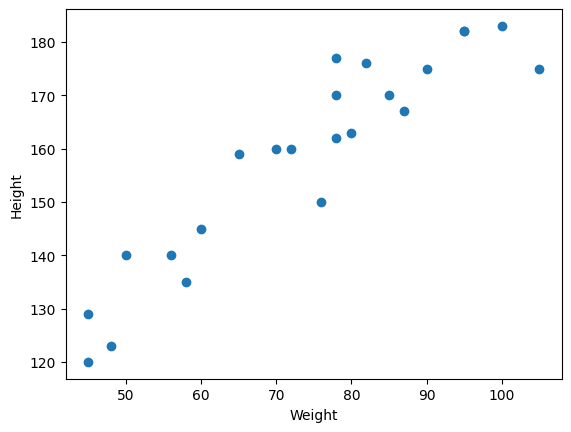

In [11]:
import matplotlib.pyplot as plt
plt.scatter(df['Weight'], df['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')
plt.show()

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Weight  23 non-null     int64
 1   Height  23 non-null     int64
dtypes: int64(2)
memory usage: 500.0 bytes


In [13]:
df.describe()

,Weight,Height
count,23.000000,23.000000
mean,73.826087,158.391304
std,17.872407,19.511626
min,45.000000,120.000000
25%,59.000000,142.500000
50%,78.000000,162.000000
75%,86.000000,175.000000
max,105.000000,183.000000


In [15]:
df.isnull().sum()

,0
Weight,0
Height,0


In [17]:
# divide into dependent and independent features
x=df['Weight']
y=df['Height']


In [18]:
x.shape

(23,)

In [19]:
y.shape

(23,)

In [21]:
# divide into trai and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [23]:
x_train,y_train

(12    105
 1      58
 13    100
 5      78
 2      48
 11     95
 20     45
 3      60
 4      70
 18     76
 16     50
 21     56
 22     72
 7      90
 10     82
 14     85
 19     87
 6      80
 Name: Weight, dtype: int64,
 12    175
 1     135
 13    183
 5     162
 2     123
 11    182
 20    129
 3     145
 4     160
 18    150
 16    140
 21    140
 22    160
 7     175
 10    176
 14    170
 19    167
 6     163
 Name: Height, dtype: int64)

In [24]:
y_test.shape

(5,)

In [25]:
y_train.shape

(18,)

In [27]:
# Standard scaling on train and test data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train.values.reshape(-1, 1))
x_test = sc.transform(x_test.values.reshape(-1, 1))


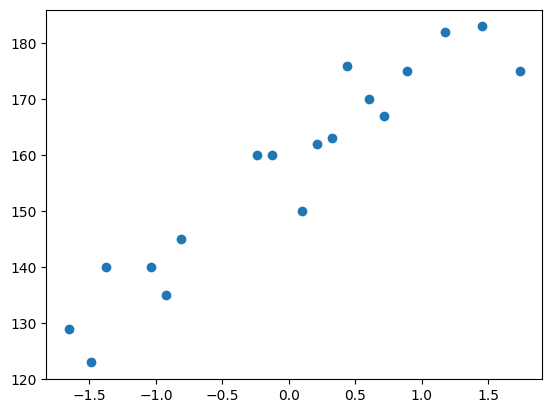

In [28]:
  plt.scatter(x_train, y_train)


In [29]:
# train the model
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train.reshape(-1, 1), y_train)


LinearRegression()

In [30]:
lr.intercept_

np.float64(157.5)

In [31]:
lr.coef_

array([17.03440872])

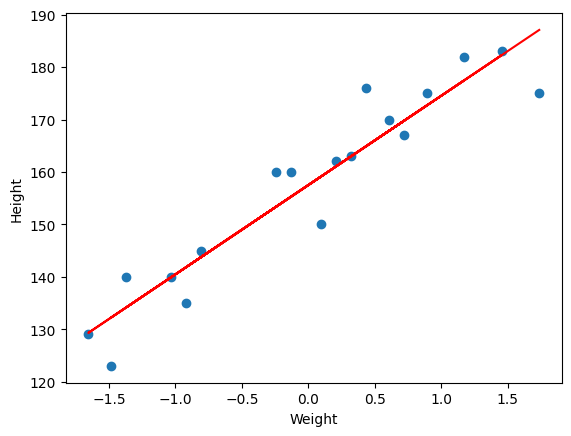

In [32]:
plt.scatter(x_train, y_train)
plt.plot(x_train, lr.predict(x_train.reshape(-1, 1)), color='red')
plt.xlabel('Weight')
plt.ylabel('Height')
plt.show()

In [34]:
# prediction of test data
y_pred_test = lr.predict(x_test.reshape(-1, 1))

In [35]:
y_pred_test

array([161.08467086, 161.08467086, 129.3041561 , 177.45645118,
       148.56507414])

In [36]:
y_test

,Height
15,177
9,170
0,120
8,182
17,159


In [37]:
# mse,mae and rmse
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse = mean_squared_error(y_test, y_pred_test)
mae = mean_absolute_error(y_test, y_pred_test)

In [40]:
# accuracy the model
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_test)

0.776986986042344

In [38]:
mse

109.77592599051664

In [39]:
mae

9.822657814519232

In [42]:
#Adjusted r square


Adjusted R-squared: 0.7026493147231252


**#Multiple linear regression**

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
from sklearn.datasets import fetch_california_housing
fetch_california_housing = fetch_california_housing()

In [46]:
fetch_california_housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [48]:
fetch_california_housing.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [50]:
print(fetch_california_housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [51]:
fetch_california_housing.target_names

['MedHouseVal']

In [52]:
fetch_california_housing.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [54]:
df=pd.DataFrame(fetch_california_housing.data, columns=fetch_california_housing.feature_names)

In [55]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [56]:
df['Price']=fetch_california_housing.target

In [57]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [59]:
df.isnull().sum()

,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0
Price,0


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [62]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [63]:
df.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
Price,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


<Axes: >

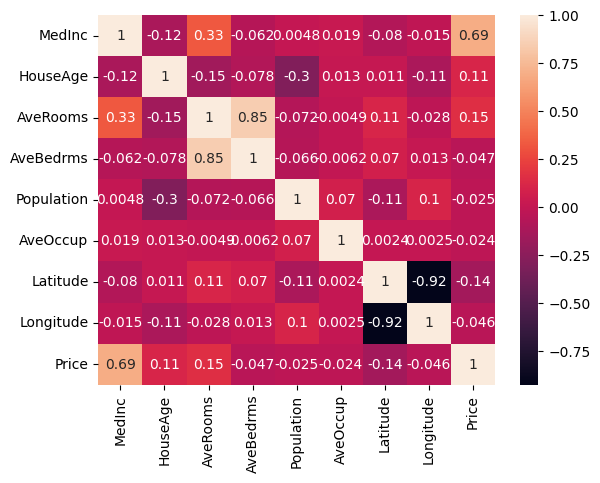

In [64]:
sns.heatmap(df.corr(), annot=True)

In [65]:
# divide into dependent and independent
x=df.drop('Price', axis=1)
y=df['Price']

In [66]:
x.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [67]:
y

,Price
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422
...,...
20635,0.781
20636,0.771
20637,0.923
20638,0.847


In [68]:
# train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [71]:
x_train.shape,x_test.shape

((16512, 8), (4128, 8))

In [72]:
# standard scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train_scaled = sc.fit_transform(x_train)
x_test_scaled = sc.transform(x_test)

In [74]:
x_train_scaled

array([[-0.326196  ,  0.34849025, -0.17491646, ...,  0.05137609,
        -1.3728112 ,  1.27258656],
       [-0.03584338,  1.61811813, -0.40283542, ..., -0.11736222,
        -0.87669601,  0.70916212],
       [ 0.14470145, -1.95271028,  0.08821601, ..., -0.03227969,
        -0.46014647, -0.44760309],
       ...,
       [-0.49697313,  0.58654547, -0.60675918, ...,  0.02030568,
        -0.75500738,  0.59946887],
       [ 0.96545045, -1.07984112,  0.40217517, ...,  0.00707608,
         0.90651045, -1.18553953],
       [-0.68544764,  1.85617335, -0.85144571, ..., -0.08535429,
         0.99543676, -1.41489815]])

In [75]:
# train the model
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train_scaled, y_train)

LinearRegression()

In [76]:
lr.coef_

array([ 0.85438303,  0.12254624, -0.29441013,  0.33925949, -0.00230772,
       -0.0408291 , -0.89692888, -0.86984178])

In [78]:
lr.intercept_

np.float64(2.0719469373788777)

<Axes: xlabel='Price'>

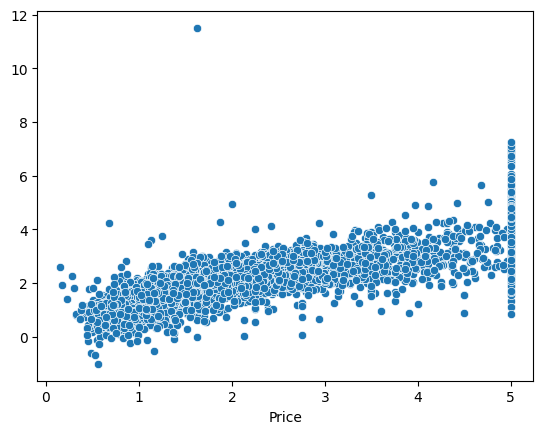

In [79]:
sns.scatterplot(x=y_test, y=lr.predict(x_test_scaled))


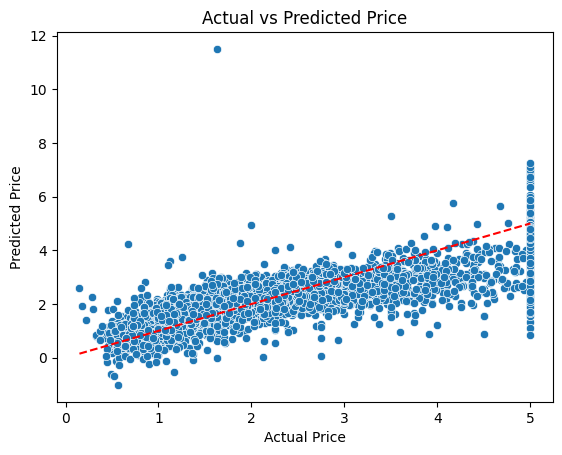

In [80]:
sns.scatterplot(x=y_test, y=lr.predict(x_test_scaled))
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Price")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.show()

In [83]:
# model prediction
y_pred_test=lr.predict(x_test_scaled)


In [84]:
y_pred_test

array([0.71912284, 1.76401657, 2.70965883, ..., 4.46877017, 1.18751119,
       2.00940251])

In [85]:
y_test

,Price
20046,0.47700
3024,0.45800
15663,5.00001
20484,2.18600
9814,2.78000
...,...
15362,2.63300
16623,2.66800
18086,5.00001
2144,0.72300


In [86]:
# find the model accuracy
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_test)

0.575787706032451

In [87]:
# find mse,mae
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse = mean_squared_error(y_test, y_pred_test)
mae = mean_absolute_error(y_test, y_pred_test)

In [88]:
mse

0.5558915986952442

In [89]:
# Adjusted R square
n = len(y_test)  # number of observations
p = x_test.shape[1]  # number of features
adjusted_r2 = 1 - (1 - r2_score(y_test, y_pred_test)) * (n - 1) / (n - p - 1)
print("Adjusted R-squared:", adjusted_r2)

Adjusted R-squared: 0.574963792861356
